In [32]:
#1
import numpy as np
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


df = pd.read_csv("ZIONO_weekly_return_volatility.csv")
df.label = df.label.fillna(method='ffill')
df_21 = df[df.Year==2021]
df_22 = df[df.Year==2022]
df_22.head(10)
df_21.head() # mean

,Year,Week_Number,mean_return,volatility,label
2,2021,1,-0.2586,0.729467,green
3,2021,2,0.0776,0.787634,red
4,2021,3,0.9710,2.437100,green
5,2021,4,-0.5042,1.114784,red
6,2021,5,0.1458,1.217830,green


In [17]:
# 1 , construct df_train
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats

x_21 = df_21[["mean_return", "volatility"]].values
le = LabelEncoder()
y_21 = le.fit_transform(df_21["label"].values)
y_22 = le.transform(df_22["label"].values)


df_train = pd.DataFrame({'x1': df_21["mean_return"].values, 'x2': df_21['volatility'], 'y': y_21})
df_train.head()

,x1,x2,y
2,-0.2586,0.729467,0
3,0.0776,0.787634,1
4,0.9710,2.437100,0
5,-0.5042,1.114784,1
6,0.1458,1.217830,0


d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


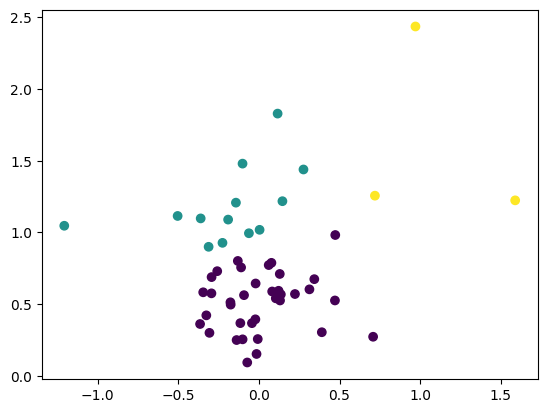

In [18]:
# 1 k=3
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

X = df_train[[ 'x1', 'x2']].values

k_means = KMeans(n_clusters=3, random_state=10)

k_means.fit(X)

y_predict = k_means.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_predict)
plt.show()



d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\ProgramData\A

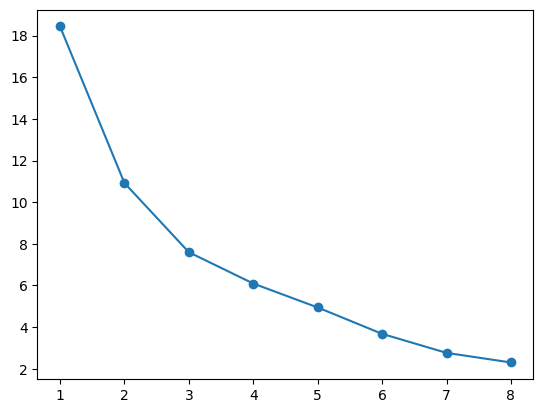

In [20]:
ret = []
for k in range(1, 9):
    k_means = KMeans(n_clusters=k, random_state=10)
    k_means.fit(X)
    ret.append(k_means.inertia_)
    
k_vals = range(1, 9)
plt.plot(k_vals, ret, 'o-')
plt.show()

In [21]:
# 1 from the curve above , we can see the best K=3

In [26]:
# 2
k_means = KMeans(n_clusters=3, random_state=10)
k_means.fit(X)
y_pred = k_means.predict(X)

y_pred

d:\ProgramData\Anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
pred_df = pd.DataFrame({"cluster_pred":y_pred, "y_ground_truth":y_21 })
pred_df.head()

,cluster_pred,y_ground_truth
0,0,0
1,0,1
2,2,0
3,1,1
4,1,0


In [39]:
for clus_val in range(3):
    cluster0 = pred_df[pred_df.cluster_pred == clus_val]
    green_0 = cluster0[cluster0.y_ground_truth == 0].shape[0]
    red_0 = cluster0[cluster0.y_ground_truth == 1].shape[0] # red
    green_0_rate = green_0 / (green_0 + red_0)
    print("cluster_id", "green_ratio", "red_ratio")
    print(clus_val, green_0_rate, 1-green_0_rate)

cluster_id green_ratio red_ratio
0 0.4444444444444444 0.5555555555555556
cluster_id green_ratio red_ratio
1 0.23076923076923078 0.7692307692307692
cluster_id green_ratio red_ratio
2 1.0 0.0


In [40]:
# YES, for cluster 2, green is 100%